Harper Kerstens

## Research question/interests

Briefly describe your research question or interests here.
I'm interested in where this online store front should increase marketting. I want to examin the online sales of the countries with the lowest and highest sales outside of the UK as the store is based in the UK. This information could be used to help increase marketting in these areas aswell as give them insight on potential difference they could make in their sales process to increase revenue from these areas.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Import data to start EDA

In [ ]:
data = pd.read_csv("../data/raw/data.csv", encoding= 'unicode_escape')

data.info()

We can see the key Columns and their information when using .info(). The dataset has up to 541909 rows total which means we can estimate the amount of product moved is around the same with the exception for canceled orders. We can also see the CustomerID number is 406829 and lower than the total number of entries for the dataset. This could be either from returning customers or due to the fact that the customer ID remains the same for every entry in a transaction and this is a detailed report of the transaction.

In [ ]:
col_date = pd.to_datetime(data['InvoiceDate'])
start_date = col_date.min()
end_data = col_date.max()

products = data['StockCode'].unique()
countries = data['Country'].unique()
print(f'{products.size} Products from {countries.size} Countries')
print(f'Start Date Range: {start_date} --> End Date Range: {end_data}')

Looking deeper we can see that this dataset is over the period of roughly a year starting in 2010/12/1 and ending at 2011/12/09.

In [ ]:
data["TotalSales"] = data["Quantity"]*data["UnitPrice"]
data

Next I Created a new column called total sales which calculates the total price spent on one item if the quantity of an item is more than 1. This will make the dataset a little bit easier to work with in the long run.

After working with the data a little I feel more comfortable to start working with the data and plotting some charts.

In [ ]:
salesByCountry = data.groupby('Country')['TotalSales'].sum()
# salesByCountry
salesByCountry.plot.bar(title="Sales by Country", xlabel='Country', ylabel='Total Sales')

This first plot showcases how the most revenue is brought in by the United Kingdom.

In [ ]:
quantityByCountry = data.groupby('Country')['Quantity'].sum()
# quantityByCountry
quantityByCountry.plot.bar(title="Quantity by Country", xlabel='Country', ylabel='No Units Sold')
#how many units per country

Simimarly we can see that the most products moved are also to the United Kingdom.

Some of the data in the dataset are related to canceled orders, something that is worth looking futher into.

In [ ]:
canceled = data['InvoiceNo'].str.startswith("C") == True
filtered_data = data[canceled]
canceledOrdersByCountry = filtered_data.where(filtered_data['Quantity']<0).groupby('Country')['Quantity'].sum()
canceledOrdersByCountry.plot.bar(title="Cancelled Orders by Country", xlabel='Country', ylabel='No Cancelled Orders')

Lets take a look at the canceled orders without the United Kingdom

In [ ]:
canceled = data['InvoiceNo'].str.startswith("C") == True
filtered_data = data[canceled]
byeUK = data['Country'].str.startswith("United Kingdom") == False
finalFiltered = filtered_data[byeUK]

canceledOrdersByCountry = finalFiltered.where(finalFiltered['Quantity']<0).groupby('Country')['Quantity'].sum()
canceledOrdersByCountry.plot.bar(title="Cancelled Orders by Country", xlabel='Country', ylabel='No Cancelled Orders')

Without the United Kingdom we see that the EIRE has the most canceled orders.

United Kingdom being the largest source of revenu it's worth comparing to the rest.

In [ ]:
uk = data[data["Country"]=="United Kingdom"]
ukSum = data['TotalSales'].sum()
nonUk = data[data["Country"]!="United Kingdom"]
nonUkSum = nonUk['TotalSales'].sum()
# nonUkSum

sampleData = [ukSum,nonUkSum]
labels = ['UK Total', 'Outside UK']
plt.xticks(range(len(sampleData)), labels)
plt.xlabel('Location')
plt.ylabel('Total Sales')
plt.title('UK vs Non Uk Sales')
plt.bar(range(len(sampleData)), sampleData) 
plt.show()

Its worth comparing the data even futher by looking at the top 10 countries and the bottom 10 countries.

In [ ]:
totalSales = data.groupby('Country').agg(TotalSales = ('TotalSales','sum')).reset_index()
topTenCountries = totalSales.nlargest(n=10, columns=['TotalSales'])
# topTenCountries
topTenCountries.plot.bar(x='Country', y='TotalSales', title="Top 10 Sales by Country",xlabel='Country',ylabel='Total Sales')

Since United Kingdom is so prevelant so lets show the top 10 without the United Kingdom

In [ ]:
totalSales = data.groupby('Country').agg(TotalSales = ('TotalSales','sum')).reset_index()
removedUK= data['Country'].str.startswith("United Kingdom") == False
totalSales = data[removedUK]
topTenCountries = totalSales.nlargest(n=10, columns=['TotalSales'])
# topTenCountries
topTenCountries.plot.bar(x='Country', y='TotalSales', title="Top 10 Sales by Country",xlabel='Country',ylabel='Total Sales')

In [ ]:
totalSales = data.groupby('Country').agg(TotalSales = ('TotalSales','sum')).reset_index()
bottomTenCountries = totalSales.nsmallest(n=10, columns=['TotalSales'])
# bottomTenCountries
bottomTenCountries.plot.bar(x='Country', y='TotalSales', title="Bottom 10 Sales by Country",xlabel='Country',ylabel='Total Sales')

Now that weve plotted some points and made some charts it'd be nice to look into the specifics of the dataset.

In [ ]:
col_date = pd.to_datetime(data['InvoiceDate'])
# col_date
start_date = col_date.min()
# start_date
end_data = col_date.max()

products = data['StockCode'].unique()
# products.size
countries = data['Country'].unique()
# countries.size
print(f'{products.size} Products from {countries.size} Countries')
print(f'Start Date Range: {start_date} --> End Date Range: {end_data}')


Here we can see that this dataset consists of a total of 4070 products and they shipped to a total of 38 countries.

Now that we've worked with our data and altered the dataframe we should export a new cvs file to workwith in the future. 

In [ ]:
HarperData = data
HarperData.to_csv('../data/processed/HarperData.csv', index= False)


Analysis on EDA

When analysing this data we can see that a large part of their revenu is from the United Kingdom. As the store is located in United Kingdom this makes sense as they are bound to have a larger presence. We can similarly see they are struggling to move products to places such as the United States and it could be worth it in the long run for them to start marketing in some of these areas where sales are the lowest. Perhaps there is an exterior reason for the sales being lower in these countries that isn't visable in the dataset. Learning how to create a work with datasets and create a narative story through Visual Studios has been challenging but a very rewarding experience.

Without the United Kingdom we see that the EIRE has the most canceled orders.

United Kingdom being the largest source of revenu it's worth comparing to the rest.

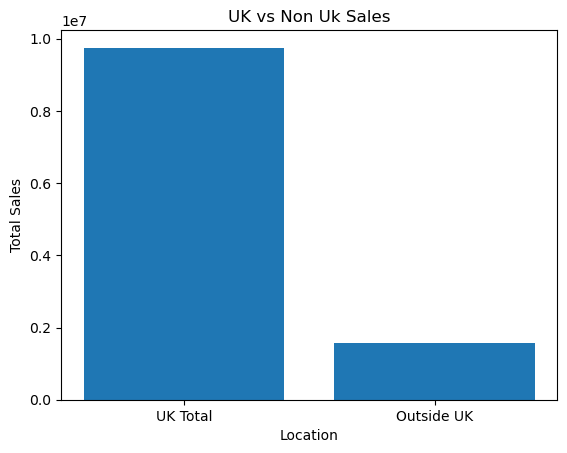

In [8]:
uk = data[data["Country"]=="United Kingdom"]
ukSum = data['TotalSales'].sum()
nonUk = data[data["Country"]!="United Kingdom"]
nonUkSum = nonUk['TotalSales'].sum()
# nonUkSum

sampleData = [ukSum,nonUkSum]
labels = ['UK Total', 'Outside UK']
plt.xticks(range(len(sampleData)), labels)
plt.xlabel('Location')
plt.ylabel('Total Sales')
plt.title('UK vs Non Uk Sales')
plt.bar(range(len(sampleData)), sampleData) 
plt.show()

Its worth comparing the data even futher by looking at the top 10 countries and the bottom 10 countries.

<AxesSubplot:title={'center':'Top 10 Sales by Country'}, xlabel='Country', ylabel='Total Sales'>

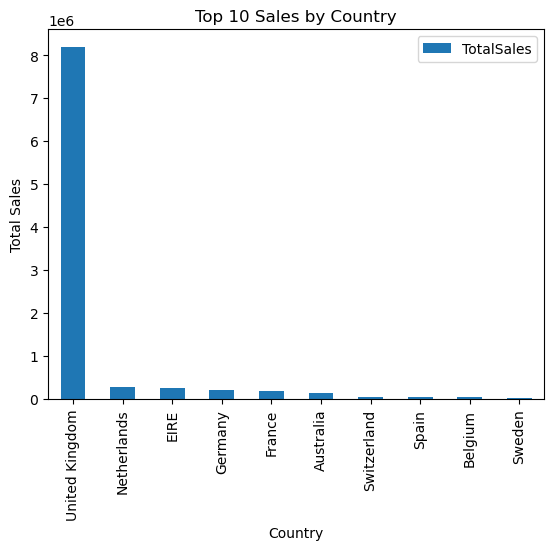

In [9]:
totalSales = data.groupby('Country').agg(TotalSales = ('TotalSales','sum')).reset_index()
topTenCountries = totalSales.nlargest(n=10, columns=['TotalSales'])
# topTenCountries
topTenCountries.plot.bar(x='Country', y='TotalSales', title="Top 10 Sales by Country",xlabel='Country',ylabel='Total Sales')

Since United Kingdom is so prevelant so lets show the top 10 without the United Kingdom

<AxesSubplot:title={'center':'Top 10 Sales by Country'}, xlabel='Country', ylabel='Total Sales'>

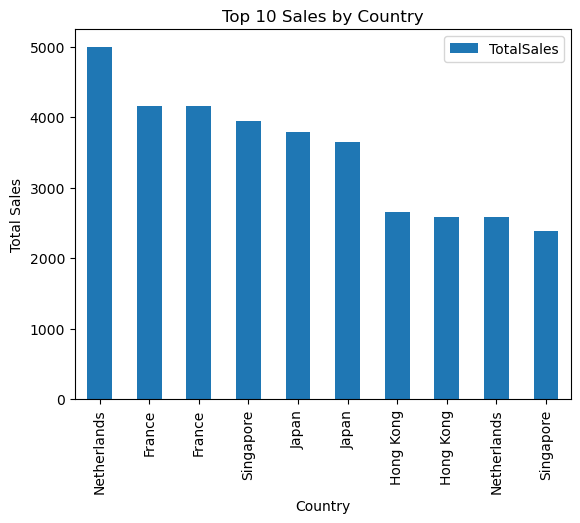

In [14]:
totalSales = data.groupby('Country').agg(TotalSales = ('TotalSales','sum')).reset_index()
removedUK= data['Country'].str.startswith("United Kingdom") == False
totalSales = data[removedUK]
topTenCountries = totalSales.nlargest(n=10, columns=['TotalSales'])
# topTenCountries
topTenCountries.plot.bar(x='Country', y='TotalSales', title="Top 10 Sales by Country",xlabel='Country',ylabel='Total Sales')

<AxesSubplot:title={'center':'Bottom 10 Sales by Country'}, xlabel='Country', ylabel='Total Sales'>

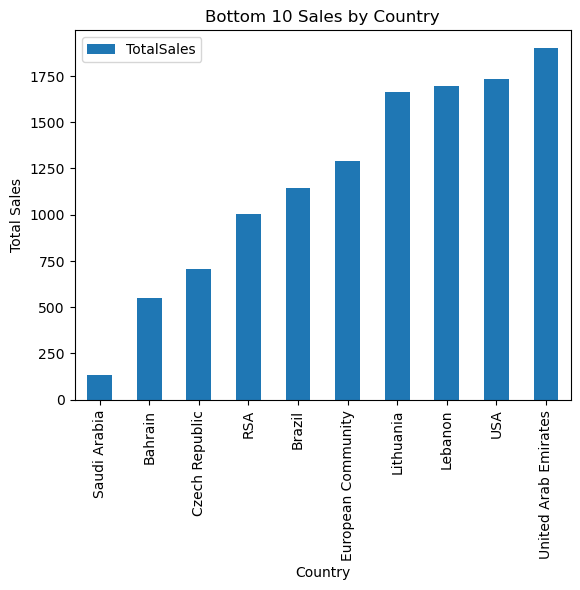

In [10]:
totalSales = data.groupby('Country').agg(TotalSales = ('TotalSales','sum')).reset_index()
bottomTenCountries = totalSales.nsmallest(n=10, columns=['TotalSales'])
# bottomTenCountries
bottomTenCountries.plot.bar(x='Country', y='TotalSales', title="Bottom 10 Sales by Country",xlabel='Country',ylabel='Total Sales')

Now that weve plotted some points and made some charts it'd be nice to look into the specifics of the dataset.

In [11]:
col_date = pd.to_datetime(data['InvoiceDate'])
# col_date
start_date = col_date.min()
# start_date
end_data = col_date.max()

products = data['StockCode'].unique()
# products.size
countries = data['Country'].unique()
# countries.size
print(f'{products.size} Products from {countries.size} Countries')
print(f'Start Date Range: {start_date} --> End Date Range: {end_data}')


4070 Products from 38 Countries
Start Date Range: 2010-12-01 08:26:00 --> End Date Range: 2011-12-09 12:50:00


Here we can see that this dataset consists of a total of 4070 products and they shipped to a total of 38 countries.

Now that we've worked with our data and altered the dataframe we should export a new cvs file to workwith in the future. 

In [12]:
HarperData = data
HarperData.to_csv('../data/processed/HarperData.csv', index= False)


Analysis on EDA

When analysing this data we can see that a large part of their revenu is from the United Kingdom. As the store is located in United Kingdom this makes sense as they are bound to have a larger presence. We can similarly see they are struggling to move products to places such as the United States and it could be worth it in the long run for them to start marketing in some of these areas where sales are the lowest. Perhaps there is an exterior reason for the sales being lower in these countries that isn't visable in the dataset. Learning how to create a work with datasets and create a narative story through Visual Studios has been challenging but a very rewarding experience.